# Laura Tran Homework 2

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [24]:
data = pd.read_csv("Possum.csv")

In [25]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


### Use a method of curve fitting discussed in class to predict a possum's total length based on its head length. Make sure to visualize the data.

In [26]:
from scipy.optimize import curve_fit

In [27]:
def linear_line(x, m, b):
    return m*x+b

In [28]:
opt, cov = curve_fit(linear_line, data.hdlngth, data.totlngth)
print(opt)
print(cov)

[0.8336698  9.88823298]
[[ 7.45261273e-03 -6.90133423e-01]
 [-6.90133423e-01  6.40025906e+01]]


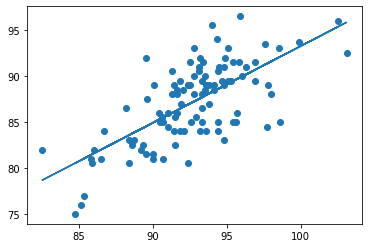

In [29]:
plt.scatter(data.hdlngth, data.totlngth)

plt.plot(data.hdlngth, linear_line(data.hdlngth, opt[0], opt[1]))

### 1. How well does the method describe the data?

#### You can see that the curve fit doesn't really describe the data that well because the data points are far from the line.

### 2. If you perform regression for male and female possums separately, does this increase our accuracy?

In [30]:
data_f = data.loc[data['sex'] == 'f']

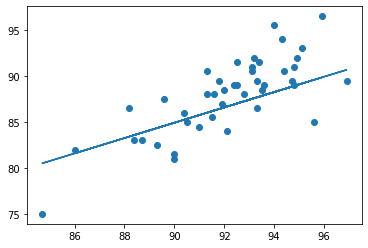

In [31]:
plt.scatter(data_f.hdlngth, data_f.totlngth)

plt.plot(data_f.hdlngth, linear_line(data_f.hdlngth, opt[0], opt[1]))

In [32]:
data_f.totlngth_pred = linear_line(data_f.hdlngth, *opt)

C:\Users\Student\AppData\Local\Temp\ipykernel_4296\1864228587.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_f.totlngth_pred = linear_line(data_f.hdlngth, *opt)


In [33]:
print(r2_score(data_f.totlngth, data_f.totlngth_pred))
print(mean_squared_error(data_f.totlngth, data_f.totlngth_pred))

0.4526029275679738
9.351934083858993


In [34]:
data_m = data.loc[data['sex'] == 'm']

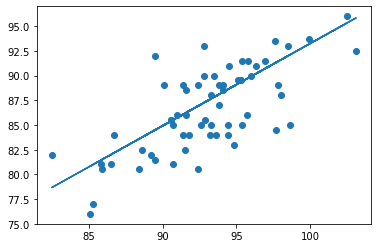

In [35]:
plt.scatter(data_m.hdlngth, data_m.totlngth)

plt.plot(data_m.hdlngth, linear_line(data_m.hdlngth, opt[0], opt[1]))

In [36]:
data_m.totlngth_pred = linear_line(data_m.hdlngth, *opt)

C:\Users\Student\AppData\Local\Temp\ipykernel_4296\1504968055.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_m.totlngth_pred = linear_line(data_m.hdlngth, *opt)


In [37]:
print(r2_score(data_m.totlngth, data_m.totlngth_pred))
print(mean_squared_error(data_m.totlngth, data_m.totlngth_pred))

0.47116267487586594
9.797205323147594


#### The accuracy isn't increased, and the accuracy is still bad.

## What are the three best classifiers?

In [38]:
from sklearn.linear_model import Lasso

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
data = data.dropna()

In [41]:
lasso_hdlngth = np.array(data.hdlngth).reshape(-1,1)

In [46]:
data['sex_num'] = data['sex'].replace(['f', 'm'], [0,1], inplace=False)

In [50]:
train, test = train_test_split(data, test_size=0.2, random_state= 1010)

x = train[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y = train['sex'].values
y_num = train['sex_num'].values

test_x = test[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
test_y = test['sex'].values
test_y_num = test['sex_num'].values

print(test_y_num)


[0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0]


In [58]:
lasso = Lasso(alpha=0.12)
lasso.fit(x, y_num)

Lasso(alpha=0.12)

In [59]:
lasso_train = lasso.predict(x)
lasso_test = lasso.predict(test_x)

In [60]:
print(lasso.coef_)

[-0.          0.00815008  0.         -0.         -0.01056065 -0.
  0.         -0.00349795 -0.00195705]


### The three best classifiers are belly, footlgth, and chest.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix